In [11]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sys.path.append(os.path.join(".."))

from utils import mod_df, drop_features, inverse_mod_X, inverse_mod_y
from my_model import create_model_1, create_model_1_1, create_model_1_2, create_model_2, create_model_2_1
# tf.__version__

In [12]:
train_df = pd.read_csv(os.path.join('..', 'data', 'unionTrain.csv'))
test_df = pd.read_csv(os.path.join('..', 'data', 'unionTest.csv'))

In [13]:
X_train, y_train = mod_df(train_df)
X_test, y_test = mod_df(test_df)

In [14]:
X_train.head()

,id,timestep,0X,0Y,1X,1Y,2X,2Y,3X,3Y,...,20X,20Y,21X,21Y,22X,22Y,23X,23Y,24X,24Y
0,0,0,203.818390,137.074432,213.271698,120.394463,218.456604,128.786789,214.281204,138.171570,...,210.125015,171.507645,204.950775,114.187561,208.034271,121.458298,203.839584,121.479103,201.784210,129.874954
1,0,1,202.822815,137.111649,213.233521,121.473770,215.352936,130.859268,213.268051,138.193253,...,209.080460,173.617630,204.964294,116.281158,209.055069,122.527069,203.912079,122.559517,203.803741,130.867661
2,0,2,203.875107,135.035492,213.195465,122.542183,215.313980,131.896347,213.288605,138.153976,...,211.121414,173.602219,208.029663,119.379250,210.089417,123.566948,204.913666,124.592056,203.876740,130.896652
3,0,3,204.877747,139.191315,212.251190,124.581474,214.282669,133.981262,213.277390,145.446198,...,211.140640,173.631348,204.936920,114.205772,209.082413,121.528427,203.846283,122.520920,202.799561,130.850388
4,0,4,203.836639,131.908508,214.268494,121.539581,218.434967,131.926605,215.344208,142.320038,...,209.083206,177.765503,205.969620,114.200150,209.060226,121.504112,203.853134,122.494194,202.833908,129.856369


Index: 0, Severity: 1


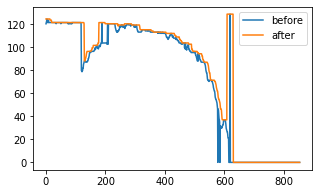

Index: 1, Severity: 2


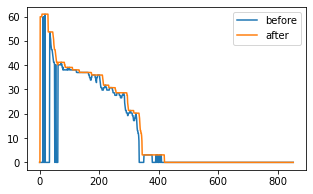

Index: 2, Severity: 2


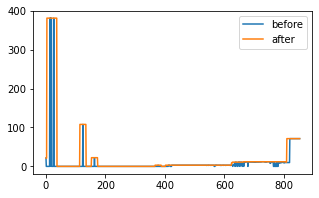

Index: 3, Severity: 2


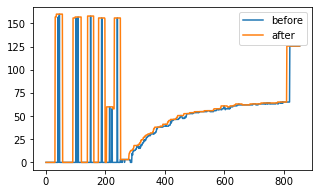

Index: 4, Severity: 1


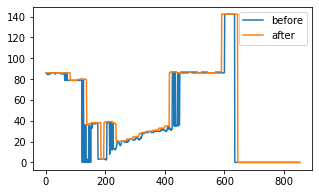

Index: 5, Severity: 2


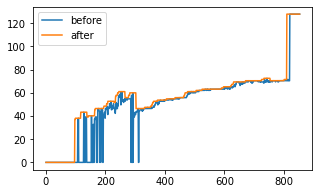

Index: 6, Severity: 2


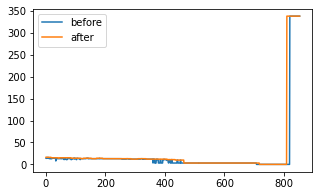

Index: 7, Severity: 1


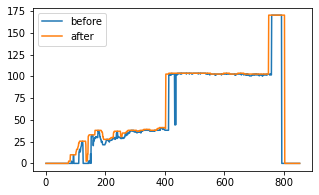

Index: 8, Severity: 2


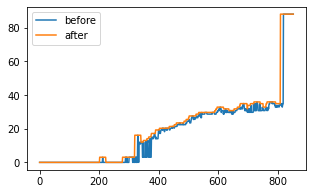

Index: 9, Severity: 2


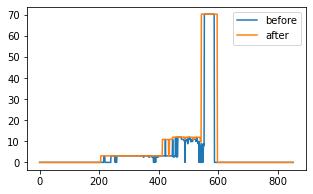

In [30]:
from scipy.signal import savgol_filter, medfilt
from scipy.ndimage import maximum_filter

def apply_savgol_filter(np_array, window_size=20, polynomial=1):
    smooth_np_array = savgol_filter(np_array, window_size, polynomial)
    return smooth_np_array

def apply_median_filter(np_array, window_size=17):
    smooth_np_array = medfilt(np_array, window_size)
    return smooth_np_array

def apply_maximum_filter(np_array, window_size=24):
    smooth_np_array = maximum_filter(np_array, window_size)
    return smooth_np_array

def apply_is_zero(np_array):
    is_zero = (np_array<1).astype(np.float32)
    return is_zero

for i in range(20):
    feature = X_train['1Y']
    sample_sub_feature = feature[i*854:(i+1)*854].to_numpy()
    smoothed_data = apply_savgol_filter(sample_sub_feature, window_size=21)
    # smoothed_data = apply_median_filter(smoothed_data, window_size=5)
    # smoothed_data = apply_median_filter(sample_sub_feature, window_size=25)
    smoothed_data = apply_maximum_filter(sample_sub_feature, window_size=21)
    # smoothed_data = apply_median_filter(smoothed_data, window_size=25)
    # smoothed_data = apply_is_zero(sample_sub_feature)
    plt.figure(figsize=(5, 3))
    # plt.plot(sample_sub_feature, label=s'before')
    plt.plot(smoothed_data, label='after')
    plt.legend()
    plt.show()
    # smoothed_data

In [ ]:
def feature_engineering(df):
    result = df.copy()
    # add features
    
    # drop features
    result = drop_features(result, [15, 16, 17, 18, 20, 21, 23, 24])
    result = result.drop(['id', 'timestep'], axis=1)
    
    # modify features
    tmp_len = len(result)//854
    for col in result.columns.to_list():
        feature = result[col]
        result[col] = apply_savgol_filter(feature.to_numpy())
        # sample_sub_feature = feature[0:100]
        # print(sample_sub_feature.to_list())
        # plt.plot(sample_sub_feature)
    
    return result
X_train_1 = feature_engineering(X_train)
X_train_1